In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('AdvertisingBudgetandSales.csv')

In [6]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
df=df.drop(['Unnamed: 0'],axis=1)

In [9]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [15]:
#plt.boxplot(x=df['TV Ad Budget ($)'])
#plt.boxplot(df[col_name])
col=list(df.columns)
col

['TV Ad Budget ($)',
 'Radio Ad Budget ($)',
 'Newspaper Ad Budget ($)',
 'Sales ($)']

In [16]:
col.remove('Sales ($)')

In [17]:
col

['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']

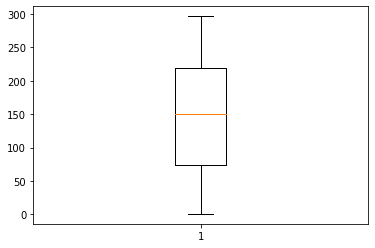

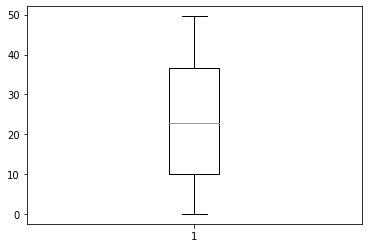

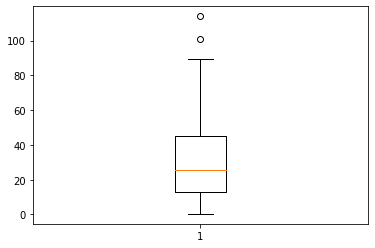

In [19]:
for i in col:
    plt.boxplot(df[i])
    plt.show()

In [24]:
Q1=df.quantile(0.25)
Q2=df.quantile(0.75)
IQR=Q2-Q1
print (IQR)

TV Ad Budget ($)           144.450
Radio Ad Budget ($)         26.550
Newspaper Ad Budget ($)     32.350
Sales ($)                    7.025
dtype: float64


In [26]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q2 + 1.5 * IQR))).any(axis=1)]

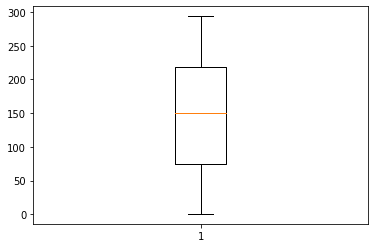

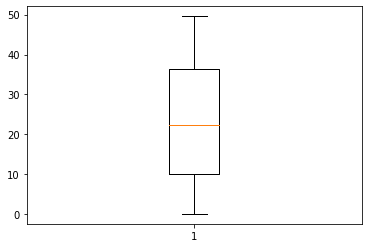

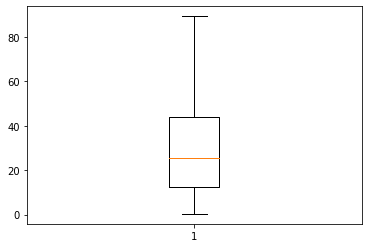

In [27]:
for i in col:
    plt.boxplot(df[i])
    plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         198 non-null    float64
 1   Radio Ad Budget ($)      198 non-null    float64
 2   Newspaper Ad Budget ($)  198 non-null    float64
 3   Sales ($)                198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


In [29]:
df.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


In [30]:
df.corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.051978,0.049771,0.779121
Radio Ad Budget ($),0.051978,1.000000,0.346364,0.576748
Newspaper Ad Budget ($),0.049771,0.346364,1.000000,0.219555
Sales ($),0.779121,0.576748,0.219555,1.000000


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df[col]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_df)

                   feature       VIF
0         TV Ad Budget ($)  2.502183
1      Radio Ad Budget ($)  3.275285
2  Newspaper Ad Budget ($)  3.126386


In [36]:
col

['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']

In [37]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [41]:
x=df[col]
y=df['Sales ($)']

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
#x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.75, random_state=0)
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.80, random_state=0)

In [53]:
x_train.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
133,219.8,33.5,45.1
175,276.9,48.9,41.8
27,240.1,16.7,22.9
62,239.3,15.5,27.3
147,243.2,49.0,44.3


In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158,)
(40,)


In [57]:
linear=LinearRegression()

In [59]:
linear.fit(x_train,y_train)

LinearRegression()

In [61]:
pred=linear.predict(x_test)

In [62]:
pred

array([14.01074388,  7.32660883, 16.91029923, 12.10494494, 10.32680801,
       15.800589  , 12.86917345, 14.46182171, 10.88622651, 16.12070585,
       22.89188978,  4.44772138, 14.47452338, 15.16779294, 13.08219004,
       11.93756336,  7.38163825, 11.34017618,  9.97074394, 17.25257133,
       20.92597453,  9.48506413,  8.89608111, 12.37384205,  9.35819552,
       16.12716079, 12.20096627, 20.59655504, 21.36951517, 15.07208869,
       23.2153892 , 20.87809592,  9.72208672, 24.06696712, 16.36688684,
        7.97869287, 21.91262979, 13.29393385, 11.82322424,  9.07954633])

In [63]:
error_pred=pd.DataFrame(columns={'Actual_data','Prediction_data'})

In [64]:
error_pred['Actual_data']=y_test

In [65]:
error_pred['Prediction_data']=pred

In [66]:
error_pred

,Prediction_data,Actual_data
19,14.010744,14.6
170,7.326609,8.4
64,16.910299,18.0
177,12.104945,11.7
72,10.326808,8.8
87,15.800589,16.0
5,12.869173,7.2
120,14.461822,15.5
12,10.886227,9.2
152,16.120706,16.6


In [67]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

In [68]:
error_pred

,Prediction_data,Actual_data,Error
19,14.010744,14.6,0.589256
170,7.326609,8.4,1.073391
64,16.910299,18.0,1.089701
177,12.104945,11.7,-0.404945
72,10.326808,8.8,-1.526808
87,15.800589,16.0,0.199411
5,12.869173,7.2,-5.669173
120,14.461822,15.5,1.038178
12,10.886227,9.2,-1.686227
152,16.120706,16.6,0.479294


In [69]:
from sklearn.metrics import *

In [70]:
train_predict=linear.predict(x_train)
train_predict

array([19.236154  , 24.67737919, 16.83694769, 16.6030093 , 23.20181053,
       20.67243832,  3.56892161,  8.76380552, 12.34848929,  6.04999947,
       16.99539944,  8.67042595, 14.97408985, 10.83972879, 15.34866802,
       11.3683035 , 15.32923913, 17.25811477, 12.61123737, 13.76739456,
       18.61959151, 14.53772167, 18.13308823, 13.68634471,  4.55682535,
       21.39212297, 17.0938578 , 20.59443188,  8.29875168, 19.3550049 ,
        6.56450136,  9.78361632,  6.43452824, 10.34310221, 18.36354798,
       19.3342806 , 18.425138  , 19.18744449, 19.63076565, 12.50832335,
       21.47505215,  5.27904783,  3.60743924, 13.01792769, 12.64813801,
        5.69290333, 14.12097121, 14.86060749,  9.02791838,  6.99189235,
       14.55967034, 17.06688626,  4.5270764 , 15.76781099, 12.15763161,
       10.78764286, 10.30370993, 13.57442928, 10.55087385,  8.23939137,
        9.11382259, 20.66252358, 16.39556674, 14.80850544, 12.33500681,
        7.63267925, 16.87294791, 21.17352674, 17.72077334, 12.54

In [73]:
r2_on_test=r2_score(y_test, pred)
r2_on_test

0.9098946359000558